<a href="https://colab.research.google.com/github/Druwa-git/Scene_Classifier/blob/main/CNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>실전 프로젝트 - CNN을 활용한 풍경(Scene) 이미지 분류</b>

* 한 장의 풍경 이미지가 주어졌을 때, 어떠한 카테고리(category)에 속하는지 맞히는 <b>분류 모델</b>을 만드세요.
* 다음의 세 가지 대표적인 CNN 모델을 실습합니다.
    1. [LeNet (1998)](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
    2. [AlexNet (2012 NIPS)](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)
    3. [ResNet (2016 CVPR)](https://arxiv.org/abs/1512.03385)
* 성능을 올릴 수 있는 두 가지 심화 기법을 실습합니다.
    1. [Mixup (ICLR 2018)](https://arxiv.org/abs/1710.09412): 데이터 증진 기법의 일종으로 정확도를 높입니다.
    2. Transfer Learning: 학습 속도와 정확도를 모두 향상시킬 수 있습니다.
* 본 프로젝트는 <b>총 7개의 문제</b>로 구성됩니다.
    * <b>Problem</b>이라고 명시된 부분의 소스코드만 작성합니다.
    * <b>알아보기</b>라고 명시된 부분은 단순히 읽고 실행하면 됩니다.
    * 단계적으로 문제를 풀어나가는 과정에서 CNN 기반의 고성능 분류 모델을 학습하는 방법을 이해할 수 있습니다.
* (참고) 본 실습 코드에서는 빠른 결과 도출을 위해 30~50 epoch 정도만 학습합니다.
    * 풍경 데이터셋에 대하여 완전히 학습시키기 위해서는 100 epoch 이상의 학습이 필요합니다.

#### <b>(알아보기) 지난 프로젝트 Review</b>

* 지난 프로젝트에서는 Scene Classification 데이터셋에 대하여 간단한 기계학습 모델을 학습했습니다.
    1. 선형 분류 모델(Linear Models for Classification)
    2. KNN (K-Nearest Neighbors)
* 하지만, 두 기법 모두 정확도(accuracy)가 <b>60% 미만</b>으로 낮게 나온다는 <b>한계점</b>이 존재했습니다.
* 본 실습에서는 CNN을 이용해 정확도를 <b>최소한 90% 이상으로</b> 높입니다.
    * 실제로 현업에서 많이 사용되는 테크닉을 이용해 최대한 정확도를 끌어올려 봅시다.

#### <b>Problem 1. 데이터셋 다운로드 및 분석하기</b>

* [PyTorch용 Scene Classification 데이터셋 저장소](https://github.com/ndb796/Scene-Classification-Dataset-Split)
    * 참고: [원본 Kaggle 데이터셋 링크](https://www.kaggle.com/nitishabharathi/scene-classification)
    * 본 데이터셋은 <b>저작권이 없는(No Copyright)</b> [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) 라이센스를 따라므로, 자유롭게 변형할 수 있습니다.
* PyTorch에서 곧바로 불러와 사용할 수 있도록 구성된 데이터셋입니다.
* 다음의 명령어를 이용해 데이터셋을 다운로드할 수 있습니다.

<pre>
# 깃허브에서 데이터셋 다운로드하기
!git clone https://github.com/ndb796/Scene-Classification-Dataset-Split 
# 폴더 안으로 이동
%cd Scene-Classification-Dataset-Split 
</pre>

In [1]:
# 깃허브에서 데이터셋 다운로드하기
!git clone https://github.com/ndb796/Scene-Classification-Dataset-Split 
# 폴더 안으로 이동
%cd Scene-Classification-Dataset-Split 

Cloning into 'Scene-Classification-Dataset-Split'...
remote: Enumerating objects: 17038, done.
remote: Total 17038 (delta 0), reused 0 (delta 0), pack-reused 17038
Receiving objects: 100% (17038/17038), 136.02 MiB | 35.93 MiB/s, done.
/content/Scene-Classification-Dataset-Split


#### <b>(알아보기) 데이터셋 설명</b>

* 본 PyTorch용 장면(scene) 데이터셋은 17,034개의 다양한 <b>자연 경치(scene)</b> 이미지로 구성되어 있습니다.
* 총 6개의 클래스(class)로 구성됩니다.

<pre>
클래스 0. 빌딩(buildings)
클래스 1. 숲(forests)
클래스 2. 빙하(glacier)
클래스 3. 산(mountains)
클래스 4. 바다(sea)
클래스 5. 거리(street)
</pre>

* 각 이미지는 공통적으로 64 X 64 크기를 가집니다.
* 데이터셋 폴더 구성은 다음과 같습니다.

<pre>
Dataset/
    train/
        buildings/
        forests/
        glacier/
        mountains/
        sea/
        streat/
    val/
        buildings/
        forests/
        glacier/
        mountains/
        sea/
        streat/
</pre>

#### <b>(알아보기) 클래스별 학습 이미지 개수 출력하기</b>

* 클래스별 데이터의 개수를 계산합니다.
    * os 라이브러리의 os.listdir()를 이용하여 이미지 폴더에 존재하는 파일 이름 목록을 얻을 수 있습니다.
    * 클래스의 개수는 6개입니다.
* 총 학습 데이터의 개수는 13,627개입니다.

<pre>
클래스 0. 빌딩(buildings): 2,105개
클래스 1. 숲(forests): 2,205개
클래스 2. 빙하(glacier): 2,363개
클래스 3. 산(mountains): 2,438개
클래스 4. 바다(sea): 2,224개
클래스 5. 거리(street): 2,292개
</pre>

* 총 검증 데이터의 개수는 3,407개입니다.

<pre>
클래스 0. 빌딩(buildings): 523개
클래스 1. 숲(forests): 540개
클래스 2. 빙하(glacier): 594개
클래스 3. 산(mountains): 599개
클래스 4. 바다(sea): 560개
클래스 5. 거리(street): 591개
</pre>

In [2]:
import os


classes = ['buildings', 'forests', 'glacier', 'mountains', 'sea', 'street']
train_path = 'train/'
val_path = 'val/'

print("[ 학습 데이터셋 ]")
for i in range(6):
    print(f'클래스 {i}의 개수: {len(os.listdir(train_path + classes[i]))}')

print("[ 검증 데이터셋 ]")
for i in range(6):
    print(f'클래스 {i}의 개수: {len(os.listdir(val_path + classes[i]))}')

[ 학습 데이터셋 ]
클래스 0의 개수: 2105
클래스 1의 개수: 2205
클래스 2의 개수: 2363
클래스 3의 개수: 2438
클래스 4의 개수: 2224
클래스 5의 개수: 2292
[ 검증 데이터셋 ]
클래스 0의 개수: 523
클래스 1의 개수: 540
클래스 2의 개수: 594
클래스 3의 개수: 599
클래스 4의 개수: 560
클래스 5의 개수: 591


#### <b>(알아보기) 데이터셋 불러오기</b>

* PyTorch의 <b>ImageFolder 라이브러리</b>를 이용하여 <b>자신만의 데이터셋</b>을 불러올 수 있습니다.
* ImageFolder 라이브러리는 다음과 같이 <b>계층적인 폴더 구조</b>에서 데이터셋을 불러올 때 사용할 수 있습니다.
    * 각 클래스명(class name)으로 된 폴더에 여러 장의 이미지가 들어가 있는 구조입니다.

<pre>
dataset/
    class 0/
        0.jpg
        1.jpg
        ...
    class 1/
        0.jpg
        1.jpg
        ...
    ...
    class 9/
        0.jpg
        1.jpg
        ...
</pre>

* 기본적인 <b>데이터 증진(data augmentation)</b> 기법을 사용합니다.
    * [RandomResizedCrop()](https://pytorch.org/vision/stable/transforms.html): 학습 시기에 랜덤으로 이미지의 일부를 잘라내어 특정 크기로 변형합니다.
    * [RandomHorizontalFlip()](https://pytorch.org/vision/stable/transforms.html): 학습 시기에 랜덤으로 이미지를 좌우 반전합니다.
* <b>정규화(normalization)를</b> 진행합니다.
    * 일반적으로 많이 사용되는 ImageNet 데이터셋의 설정을 이용합니다.

In [3]:
import torch
from torchvision import datasets, transforms


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device object

transforms_train = transforms.Compose([
    transforms.RandomResizedCrop((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_val = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_path, transforms_train)
val_dataset = datasets.ImageFolder(val_path, transforms_val)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=2)

print('Training dataset size:', len(train_dataset))
print('Validation dataset size:', len(val_dataset))

class_names = train_dataset.classes
print('Class names:', class_names)

Training dataset size: 13627
Validation dataset size: 3407
Class names: ['buildings', 'forests', 'glacier', 'mountains', 'sea', 'street']


#### <b>(알아보기) 이미지 시각화하기</b>

* PyTorch로 불러온 데이터(torch.Tensor 객체)를 시각화해 봅시다.
* Google Colab에 출력하기 위해서 NumPy 형태로 변형한 뒤에 Matplotlib을 이용합니다.
    * torch.Tensor는 (Channel, Height, Width) 형식을 가집니다.
    * numpy 객체는 (Height, Width, Channel) 형식을 가집니다.

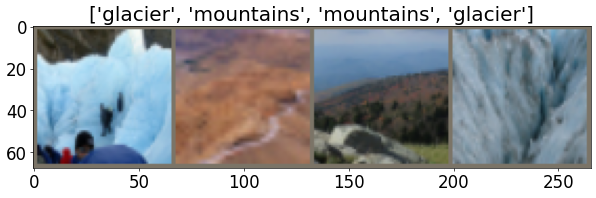

In [4]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt


# 화면에 출력되는 이미지 크기를 적절하게 조절하기
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})


def imshow(image, title):
    # torch.Tensor => numpy 변환하기
    image = image.numpy().transpose((1, 2, 0))
    # 이미지 정규화(normalization) 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    # 화면에 이미지 출력하기
    plt.imshow(image)
    plt.title(title)
    plt.show()


# 학습 데이터셋에서 하나의 배치를 불러와 보기
iterator = iter(train_dataloader)

# 현재 배치에 포함된 이미지를 출력하기
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs[:4])
imshow(out, title=[class_names[x] for x in classes[:4]])

#### <b>Problem 2. Convolution 연산 이해하기</b>

* Convolution 연산의 동작 원리를 이해할 필요가 있습니다.
* <b>[그림 예시]</b> 아래 그림에서는 stride가 1이고, padding이 0일 때의 Convolution 연산 예시를 보입니다.

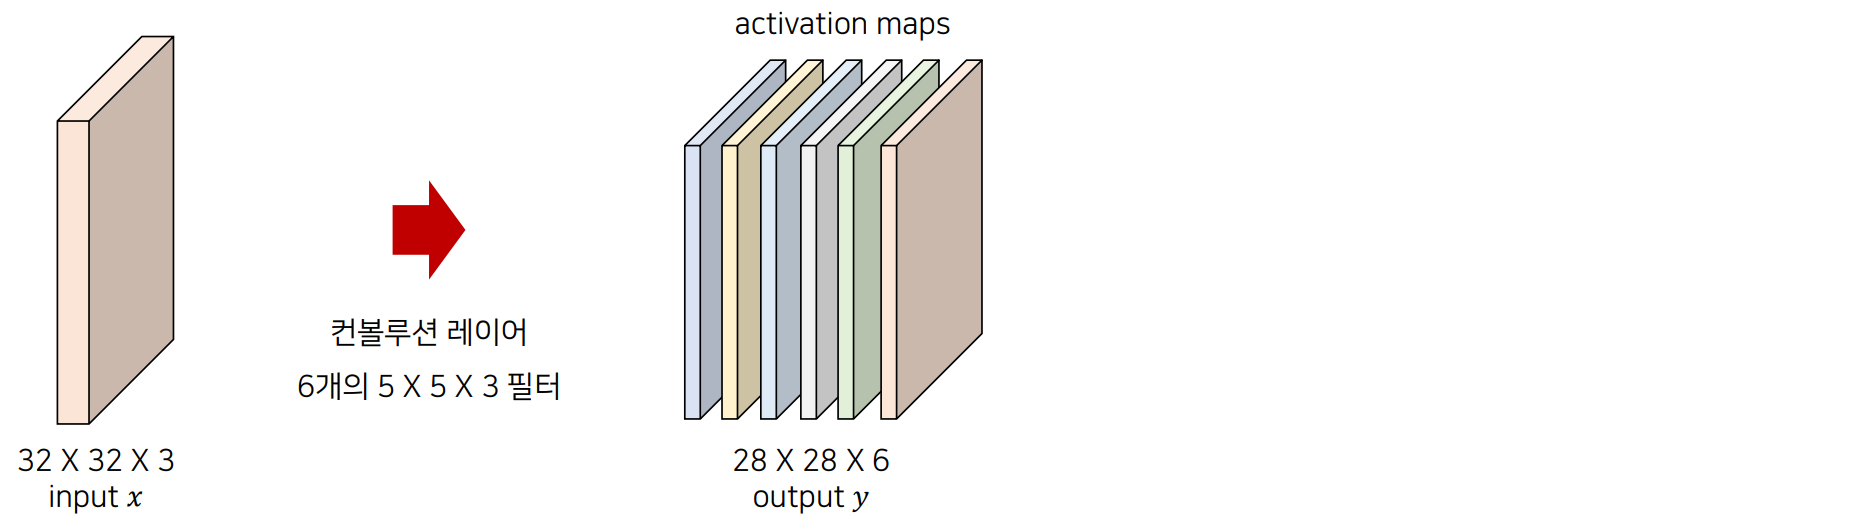

<hr>

* 입력 데이터의 높이: $height$
* 입력 데이터의 너비: $width$
* 필터의 높이: $filter\_height$
* 필터의 너비: $filter\_width$
* 스트라이드(stride): $stride$
* 패딩 크기: $padding$

<hr>

* Convolution 연산 이후의 출력 차원은 다음과 같은 공식으로 계산할 수 있습니다. (나누기할 때 소수점 아래 버림)
    * 출력 높이(output height) = $(height + 2 * padding - filter\\_height) / stride + 1$
    * 출력 너비(output width) = $(width + 2 * padding - filter\\_width) / stride + 1$

* <b>[문제]</b> 다음의 각 경우에 대하여 Convolution 연산을 수행한 뒤의 출력 차원을 쓰세요.
    1. $height=32$, $width=32$, $filter\\_height=5$, $filter\\_width=5$, $stride=2$, $padding=2$일 때 → {답을 쓰세요.}
    2. $height=64$, $width=64$, $filter\\_height=3$, $filter\\_width=3$, $stride=1$, $padding=1$일 때 → {답을 쓰세요.}
    3. $height=16$, $width=16$, $filter\\_height=4$, $filter\\_width=4$, $stride=2$, $padding=1$일 때 → {답을 쓰세요.}
    4. $height=60$, $width=45$, $filter\\_height=8$, $filter\\_width=5$, $stride=3$, $padding=1$일 때 → {답을 쓰세요.}

* (Hint) 다음과 같은 Python 코드를 사용하여 간단히 계산할 수 있습니다.

<pre>
height = 16
width = 16
filter_height = 4
filter_width = 4
stride = 2
padding = 1

output_height = (height + 2 * padding - filter_height) // stride + 1
output_width = (width + 2 * padding - filter_width) // stride + 1

print('출력 높이:', output_height, '출력 너비:', output_width)
</pre>

* 실행 결과 예시

<pre>
출력 높이: 8 출력 너비: 8
</pre>

In [12]:
height = 64
width = 64
filter_height = 5
filter_width = 5
stride = 1
padding = 0

output_height = (height + 2 * padding - filter_height) // stride + 1
output_width = (width + 2 * padding - filter_width) // stride + 1

print('출력 높이:', output_height, '출력 너비:', output_width)

출력 높이: 60 출력 너비: 60


#### <b>(알아보기) Lenet 아키텍처 이해하기</b>

* 기본적인 LeNet 아키텍처를 이해할 수 있습니다.
    * Convolutional Neural Network를 최초로(1998년) 적용한 간단한 아키텍처입니다.
    * Convolution 연산과 Pooling 연산이 사용됩니다.
* <b>아래의 표</b>와 같은 아키텍처를 PyTorch로 구현한 것을 확인해 봅시다.
    * 원본 논문과 완전히 동일하지는 않지만, 핵심 아이디어를 잘 표현한 아키텍처입니다.
    * PyTorch에서는 모델에 별도로 Softmax 레이어를 두지 않고, 학습할 때 nn.CrossEntropyLoss()를 사용하는 것이 일반적입니다.

Layer | Type | Specification
:-: | :-: | ---
1 | Input | image size: 3 X 64 X 64
2 | Convolution | # of kernel: 20, kernel size: 5 X 5, stride: 1, zero padding: 0
3 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
4 | Convolution | # of kernel: 50, kernel size: 5 X 5, stride: 1, zero padding: 0
5 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
6 | Fully Connected | # of neuron: 500
7 | Activation | ReLU
8 | Fully Connected | # of neuron: 6
9 | Softmax | 6 classes



In [6]:
import torch.nn as nn
import torch.nn.functional as F


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # → 차원(dimension): (3 x 64 x 64)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=5, stride=1, padding=0)
        # → 차원(dimension): (20 x 60 x 60)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # → 차원(dimension): (20 x 30 x 30)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1, padding=0)
        # → 차원(dimension): (50 x 26 x 26)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # → 차원(dimension): (50 x 13 x 13)
        self.fc1 = nn.Linear(50 * 13 * 13, 500)
        # → 차원(dimension): (500)
        self.fc2 = nn.Linear(500, 6)
        # → 차원(dimension): (6)

    def forward(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = torch.flatten(x, 1) # 배치(batch)를 제외한 모든 차원 flatten하기
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#### <b>(알아보기) 학습 및 평가 함수 이해하기</b>

* 별도의 학습(train) 함수와 평가(validate) 함수를 작성합니다.

In [7]:
def train(net, epoch, optimizer, criterion, train_dataloader):
    print('[ Train epoch: %d ]' % epoch)
    net.train() # 모델을 학습 모드로 설정
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad() # 기울기(gradient) 초기화

        outputs = net(inputs) # 모델 입력하여 결과 계산
        loss = criterion(outputs, targets) # 손실(loss) 값 계산
        loss.backward() # 역전파를 통해 기울기(gradient) 계산

        optimizer.step() # 계산된 기울기를 이용해 모델 가중치 업데이트
        train_loss += loss.item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print('Train accuarcy:', 100. * correct / total)
    print('Train average loss:', train_loss / total)
    return (100. * correct / total, train_loss / total)


def validate(net, epoch, val_dataloader):
    print('[ Validation epoch: %d ]' % epoch)
    net.eval() # 모델을 평가 모드로 설정
    val_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(val_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = net(inputs) # 모델 입력하여 결과 계산
        val_loss += criterion(outputs, targets).item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print('Accuarcy:', 100. * correct / total)
    print('Average loss:', val_loss / total)
    return (100. * correct / total, val_loss / total)

#### <b>(알아보기) LeNet 학습하기</b>

* 앞서 정의한 LeNet 네트워크를 학습합니다.
* 학습률(learning rate)을 수정해보면서 결과를 확인해 봅시다.
    * 만약 학습률이 너무 크다면, 발산하여 손실(loss) 값이 NaN으로 나오며 학습이 안 될 수 있습니다.

In [8]:
import time
import torch.optim as optim


net = LeNet()
net = net.to(device)

epoch = 30
learning_rate = 0.002
file_name = "LeNet.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

[ Train epoch: 0 ]


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train accuarcy: 50.979672708593235
Train average loss: 0.03965553418463426
[ Validation epoch: 1 ]
Accuarcy: 65.30672145582624
Average loss: 0.0294679827815387
Model saved! (time elapsed: 12.750088214874268)
[ Train epoch: 1 ]
Train accuarcy: 58.61157995156674
Train average loss: 0.03370500355357512
[ Validation epoch: 2 ]
Accuarcy: 70.17904314646316
Average loss: 0.02665423180023386
Model saved! (time elapsed: 24.84468698501587)
[ Train epoch: 2 ]
Train accuarcy: 61.803771923387394
Train average loss: 0.031809929974003726
[ Validation epoch: 3 ]
Accuarcy: 71.2356912239507
Average loss: 0.024996633731902505
Model saved! (time elapsed: 36.83248496055603)
[ Train epoch: 3 ]
Train accuarcy: 63.278784765539
Train average loss: 0.030329865488834932
[ Validation epoch: 4 ]
Accuarcy: 71.91077194012327
Average loss: 0.024576869989232232
Model saved! (time elapsed: 48.71635317802429)
[ Train epoch: 4 ]
Train accuarcy: 65.16474645923535
Train average loss: 0.029037292177104858
[ Validation epoch

In [62]:
print(max(val_result)[0])

92.33930143821544


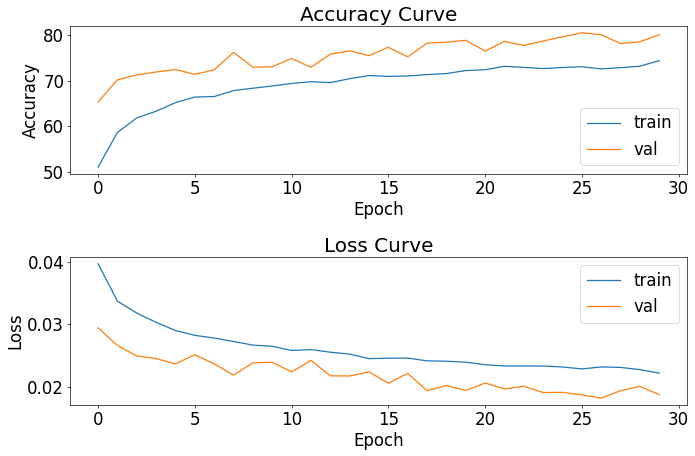

In [9]:
# 정확도(accuracy) 커브 시각화
plt.subplot(211)
plt.plot([i for i in range(epoch)], [i[0] for i in train_result])
plt.plot([i for i in range(epoch)], [i[0] for i in val_result])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])

# 손실(loss) 커브 시각화
plt.subplot(212)
plt.plot([i for i in range(epoch)], [i[1] for i in train_result])
plt.plot([i for i in range(epoch)], [i[1] for i in val_result])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])

plt.tight_layout()
plt.show()

#### <b>(알아보기) 혼동 행렬 시각화하기</b>

* 참고: [Seaborn.heatmap 공식 문서](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 
* 각 클래스에 대하여 정확히 분류하는지 확인하기 위해 <b>혼동 행렬(confusion matrix)</b>을 생성할 수 있습니다.

In [10]:
# 네트워크에 데이터셋을 입력하여 혼동 행렬(confusion matrix)을 계산하는 함수
def get_confusion_matrix(net, num_classes, data_loader):
    net.eval() # 모델을 평가 모드로 설정
    confusion_matrix = torch.zeros(num_classes, num_classes, dtype=torch.int32)

    for batch_idx, (inputs, targets) in enumerate(data_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = net(inputs)
        _, predicted = outputs.max(1)

        for t, p in zip(targets.view(-1), predicted.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

    return confusion_matrix

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


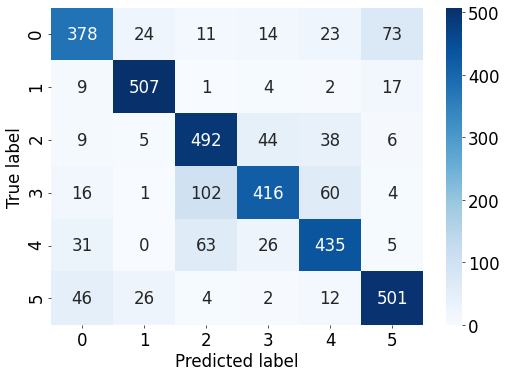

[ 각 클래스에 따른 정확도 ]
tensor([0.7228, 0.9389, 0.8283, 0.6945, 0.7768, 0.8477])
[ 전체 평균 정확도 ]
tensor(0.8010)


In [11]:
import pandas as pd
import seaborn as sns


net = LeNet()
net = net.to(device)

file_name = "./checkpoint/LeNet.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>Problem 3. CustomLeNet 아키텍처 작성하기</b>

* 다음과 같이 LeNet 아키텍처를 변경하여 CustomLeNet을 만들어 봅시다.
    * 커널 크기와 커널의 개수를 증가시켰습니다. (파라미터 수 증가)
    * Fully Connected 레이어의 차원을 증가시켰습니다. (파라미터 수 증가)

Layer | Type | Specification
:-: | :-: | ---
1 | Input | image size: 3 X 64 X 64
2 | Convolution | # of kernel: 128, kernel size: 8 X 8, stride: 1, zero padding: 0
3 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
4 | Convolution | # of kernel: 256, kernel size: 8 X 8, stride: 1, zero padding: 0
5 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
6 | Convolution | # of kernel: 512, kernel size: 4 X 4, stride: 1, zero padding: 0
7 | Pooling | max pooling, kernel size: 2 X 2, stride: 2
8 | Fully Connected | # of neuron: 4096
9 | Activation | ReLU
10 | Fully Connected | # of neuron: 6
11 | Softmax | 6 classes


In [18]:
class CustomLeNet(nn.Module):
    def __init__(self):
        super(CustomLeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=8, stride=1, padding=0)
        
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=8, stride=1, padding=0)
       
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=4, stride=1, padding=0)

        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(512 * 3 * 3, 4096)
        
        self.fc2 = nn.Linear(4096, 6)
        

    def forward(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = self.pool3(self.conv3(x))
        x = torch.flatten(x, 1) # 배치(batch)를 제외한 모든 차원 flatten하기
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [19]:
height = 10
width = 10
filter_height = 4
filter_width = 4
stride = 1
padding = 0

output_height = (height + 2 * padding - filter_height) // stride + 1
output_width = (width + 2 * padding - filter_width) // stride + 1

print('출력 높이:', output_height, '출력 너비:', output_width)

출력 높이: 7 출력 너비: 7


#### <b>(알아보기) CustomLeNet 평가하기</b>

* 새롭게 작성한 CustomLeNet과 앞선 LeNet의 성능을 비교합니다.
    * 파라미터가 증가한 만큼 성능 향상이 있는지 확인해 봅시다.
* 아래 코드를 실행하여 학습 및 성능 평가를 진행할 수 있습니다.

In [20]:
import time
import torch.optim as optim


net = CustomLeNet()
net = net.to(device)

epoch = 30
learning_rate = 0.002
file_name = "CustomLeNet.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

[ Train epoch: 0 ]
Train accuarcy: 48.1323842371762
Train average loss: 0.04104626915324869
[ Validation epoch: 1 ]
Accuarcy: 62.1074258878779
Average loss: 0.03204293866153333
Model saved! (time elapsed: 18.664907932281494)
[ Train epoch: 1 ]
Train accuarcy: 56.38805312981581
Train average loss: 0.03526762168773282
[ Validation epoch: 2 ]
Accuarcy: 60.90402113296155
Average loss: 0.031064254589573462
Model saved! (time elapsed: 37.25526022911072)
[ Train epoch: 2 ]
Train accuarcy: 59.46283114405225
Train average loss: 0.03326386333150507
[ Validation epoch: 3 ]
Accuarcy: 66.74493689462871
Average loss: 0.027777788119124357
Model saved! (time elapsed: 55.524028301239014)
[ Train epoch: 3 ]
Train accuarcy: 59.93248697438908
Train average loss: 0.03260814336580218
[ Validation epoch: 4 ]
Accuarcy: 69.00498972703258
Average loss: 0.026462031812096817
Model saved! (time elapsed: 73.53220248222351)
[ Train epoch: 4 ]
Train accuarcy: 62.05327658325383
Train average loss: 0.03131972046103841


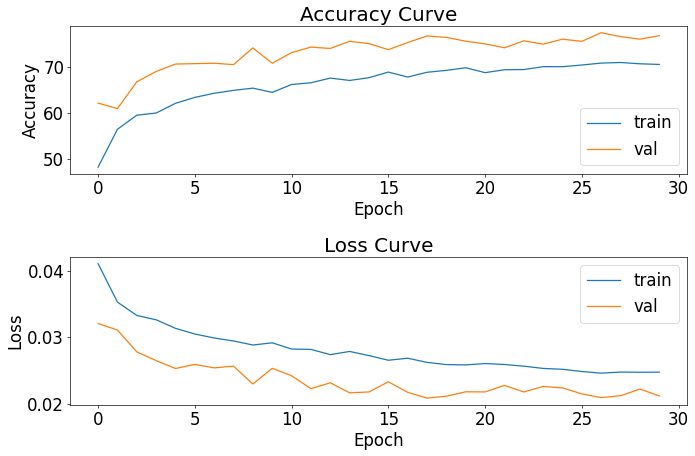

In [21]:
# 정확도(accuracy) 커브 시각화
plt.subplot(211)
plt.plot([i for i in range(epoch)], [i[0] for i in train_result])
plt.plot([i for i in range(epoch)], [i[0] for i in val_result])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])

# 손실(loss) 커브 시각화
plt.subplot(212)
plt.plot([i for i in range(epoch)], [i[1] for i in train_result])
plt.plot([i for i in range(epoch)], [i[1] for i in val_result])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])

plt.tight_layout()
plt.show()

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


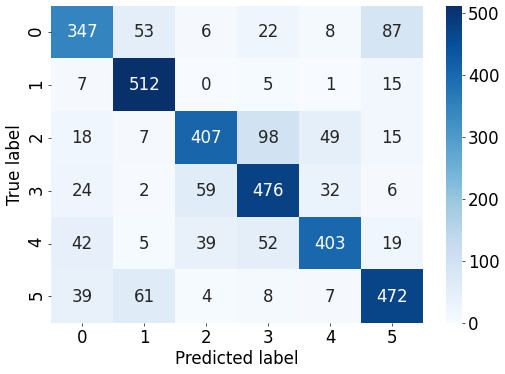

[ 각 클래스에 따른 정확도 ]
tensor([0.6635, 0.9481, 0.6852, 0.7947, 0.7196, 0.7986])
[ 전체 평균 정확도 ]
tensor(0.7681)


In [22]:
import pandas as pd
import seaborn as sns


net = CustomLeNet()
net = net.to(device)

file_name = "./checkpoint/CustomLeNet.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>Problem 4. AlexNet 아키텍처 작성하기</b>

* AlexNet은 CNN 기반의 분류 모델의 우수성을 전 세계에 알린 논문([NIPS 2012](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf))입니다.
    * ImageNet 분류 대회(ILSVRC 2012)에서 압도적인 성능으로 우승(1위)을 차지했습니다.

<hr>

* LRN (Local Response Normalization)을 활용합니다.
    * PyTorch에서 [nn.LocalResponseNorm()](https://pytorch.org/docs/stable/generated/torch.nn.LocalResponseNorm.html)을 이용해 구현할 수 있습니다.
    * Local Response Normalization은 입력과 출력의 차원이 동일한 레이어입니다.
* Dropout을 활용합니다.
    * PyTorch에서 [nn.Dropout()](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)을 이용해 구현할 수 있습니다.
* ReLU를 적극적으로 활용합니다.
    * PyTorch에서 [nn.ReLU()](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)를 이용해 구현할 수 있습니다.

<hr>

* <b>아래의 표</b>와 같은 아키텍처를 PyTorch로 구현해 봅시다.
    * 원본 논문에서 제안한 것과 완전히 동일한 아키텍처는 아니지만, 핵심 아이디어를 잘 포함하고 있습니다.

Layer | Type | Specification
:-: | :-: | ---
1 | Input | image size: 3 X 64 X 64
2 | Convolution | # of kernel: 96, kernel size: 5 X 5, stride: 1, zero padding: 2
3 | Activation | ReLU
4 | Normalization | LRN (Local Response Normalization), size: 5
5 | Pooling | max pooling, kernel size: 3 X 3, stride: 2
6 | Convolution | # of kernel: 256, kernel size: 5 X 5, stride: 1, zero padding: 2
7 | Activation | ReLU
8 | Normalization | LRN (Local Response Normalization), size: 5
9 | Pooling | max pooling, kernel size: 3 X 3, stride: 2
10 | Convolution | # of kernel: 384, kernel size: 3 X 3, stride: 1, zero padding: 1
11 | Activation | ReLU
12 | Convolution | # of kernel: 384, kernel size: 3 X 3, stride: 1, zero padding: 1
13 | Activation | ReLU
14 | Convolution | # of kernel: 256, kernel size: 3 X 3, stride: 1, zero padding: 1
15 | Activation | ReLU
16 | Pooling | max pooling, kernel size: 3 X 3, stride: 2
17 | Fully Connected | # of neuron: 4096
18 | Activation | ReLU
19 | Dropout | Probability: 0.5
20 | Fully Connected | # of neuron: 6
21 | Dropout | Probability: 0.5
22 | Softmax | 6 classes

* 표와 동일하게 정상적으로 구현했다면, <b>83~85%가량의 정확도</b>를 얻을 수 있습니다.

In [23]:
class AlexNet(nn.Module):

    def __init__(self):

        super(AlexNet, self).__init__()

        self.convnet = nn.Sequential(
            # 3 x 64 x 64
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=5, padding=2, stride=1), 
            # 96 x 64 x 64 
            nn.ReLU(inplace=True),

            nn.LocalResponseNorm(size=5, k=2),

            nn.MaxPool2d(kernel_size=3, stride=2), # 

            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding=2, stride=1), # 

            nn.ReLU(inplace=True),

            nn.LocalResponseNorm(size=5, k=2),

            nn.MaxPool2d(kernel_size=3, stride=2), # 

            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, padding=1, stride=1),

            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1, stride=1),

            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1, stride=1),

            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=3, stride=2), # 56

        )

        self.fclayer = nn.Sequential(

            nn.Linear(12544, 4096), #14 * 14 * 64

            nn.ReLU(inplace=True),

            nn.Dropout(p=0.5),

            nn.Linear(4096, 4096),

            nn.ReLU(inplace=True),

            nn.Dropout(p=0.5),

            nn.Linear(4096,6),

        )

    def forward(self, x:torch.Tensor):

        x = self.convnet(x)

        x = torch.flatten(x, 1)

        x = self.fclayer(x)

        return x

In [24]:
height = 10
width = 10
filter_height = 4
filter_width = 4
stride = 1
padding = 0

output_height = (height + 2 * padding - filter_height) // stride + 1
output_width = (width + 2 * padding - filter_width) // stride + 1

print('출력 높이:', output_height, '출력 너비:', output_width)

출력 높이: 7 출력 너비: 7


#### <b>(알아보기) AlexNet 평가하기</b>

* 아래 코드를 실행하여 학습 및 성능 평가를 진행할 수 있습니다.
* 83~85%가량의 정확도가 나오지 않는다면, 표와 동일하게 AlexNet 코드를 다시 작성했는지 확인해 주세요.

In [25]:
import time
import torch.optim as optim


net = AlexNet()
net = net.to(device)

epoch = 30
learning_rate = 0.002
file_name = "AlexNet.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

[ Train epoch: 0 ]
Train accuarcy: 17.817568063403538
Train average loss: 0.055950277766872065
[ Validation epoch: 1 ]
Accuarcy: 17.581449955972996
Average loss: 0.05598108650198562
Model saved! (time elapsed: 37.82397270202637)
[ Train epoch: 1 ]
Train accuarcy: 34.673809349086376
Train average loss: 0.04876630972143296
[ Validation epoch: 2 ]
Accuarcy: 52.39213384208981
Average loss: 0.03556334982878447
Model saved! (time elapsed: 75.71699810028076)
[ Train epoch: 2 ]
Train accuarcy: 48.286490056505464
Train average loss: 0.03896674036830959
[ Validation epoch: 3 ]
Accuarcy: 59.37775168770179
Average loss: 0.03135403300577292
Model saved! (time elapsed: 113.53023386001587)
[ Train epoch: 3 ]
Train accuarcy: 52.39597857195274
Train average loss: 0.0362308988429799
[ Validation epoch: 4 ]
Accuarcy: 63.89785735250954
Average loss: 0.0286967995091901
Model saved! (time elapsed: 151.42335677146912)
[ Train epoch: 4 ]
Train accuarcy: 55.294635649812875
Train average loss: 0.034611123314325

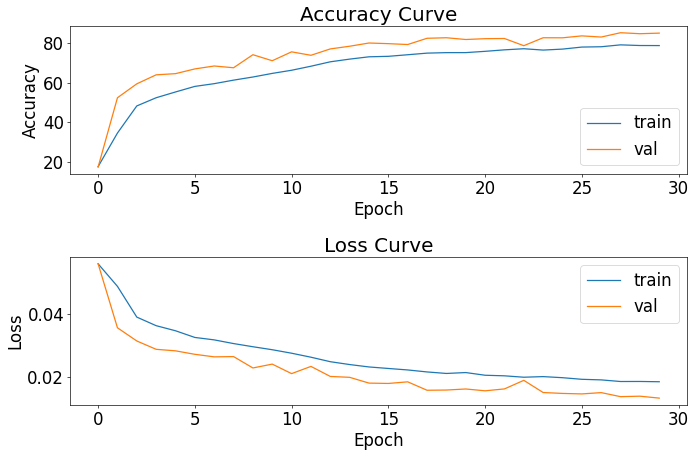

In [26]:
# 정확도(accuracy) 커브 시각화
plt.subplot(211)
plt.plot([i for i in range(epoch)], [i[0] for i in train_result])
plt.plot([i for i in range(epoch)], [i[0] for i in val_result])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])

# 손실(loss) 커브 시각화
plt.subplot(212)
plt.plot([i for i in range(epoch)], [i[1] for i in train_result])
plt.plot([i for i in range(epoch)], [i[1] for i in val_result])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])

plt.tight_layout()
plt.show()

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


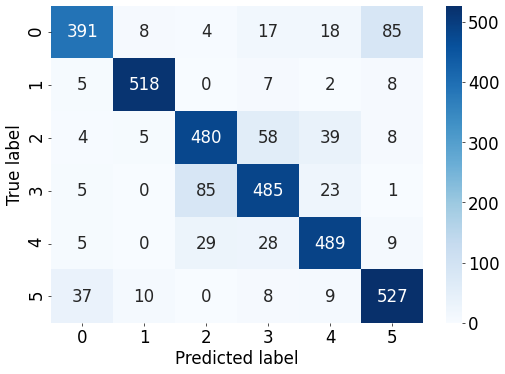

[ 각 클래스에 따른 정확도 ]
tensor([0.7476, 0.9593, 0.8081, 0.8097, 0.8732, 0.8917])
[ 전체 평균 정확도 ]
tensor(0.8483)


In [27]:
import pandas as pd
import seaborn as sns


net = AlexNet()
net = net.to(device)

file_name = "./checkpoint/AlexNet.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>(알아보기) LightResNet 아키텍처 살펴보기</b>

* [ResNet (2016 CVPR)](https://arxiv.org/abs/1512.03385) 논문에서 제안된 가벼운 ResNet을 PyTorch로 구현한 것은 다음과 같습니다.
    * 원본 논문에서는 CIFAR-10을 위하여 해당 아키텍처를 제안했습니다.
* 레이어의 깊이에 따라 다양한 버전이 있습니다.
    * 다양한 버전: 20 레이어, 32 레이어, 44 레이어, 56 레이어, 110 레이어
    * 일반적으로 더 깊은 레이어로 구성된 ResNet이 더 높은 정확도를 보입니다.

In [28]:
# ResNet을 위한 BasicBlock 클래스 정의
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()

        # 3x3 필터를 사용 (stride 값이 2라면, 너비와 높이가 절반으로 감소)
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes) # 배치 정규화(batch normalization)

        # 3x3 필터를 사용 (stride 값이 1이므로, 너비와 높이가 유지)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes) # 배치 정규화(batch normalization)

        self.shortcut = nn.Sequential() # identity인 경우
        if stride != 1: # stride가 1이 아니라면, identity mapping이 아닌 경우
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size=1, stride=stride, padding=0, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x) # (핵심) skip connection
        out = F.relu(out)
        return out


# LightResNet 클래스 정의
class LightResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=6):
        super(LightResNet, self).__init__()
        self.in_planes = 16

        # 16개의 3x3 필터(filter)를 사용
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        # 첫 레이어를 제외하고는 너비와 높이를 줄이기 위해 stride를 2로 설정
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)
        self.linear = nn.Linear(64, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1) # 첫째 블록만 너비와 높이 감소
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes # 다음 레이어를 위해 채널 수 변경
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, out.size()[3])
        out = out.view(out.size(0), -1) # 배치(batch)를 제외한 모든 차원 flatten하기
        out = self.linear(out)
        return out


def LightResNet20():
    return LightResNet(BasicBlock, [3, 3, 3])


def LightResNet32():
    return LightResNet(BasicBlock, [5, 5, 5])


def LightResNet44():
    return LightResNet(BasicBlock, [7, 7, 7])


def LightResNet56():
    return LightResNet(BasicBlock, [9, 9, 9])


def LightResNet110():
    return LightResNet(BasicBlock, [18, 18, 18])

#### <b>(알아보기) LightResNet-20 학습하기</b>

* PyTorch로 구현된 LightResNet-20 모델을 학습해 봅시다.

In [29]:
import time
import torch.optim as optim


net = LightResNet20()
net = net.to(device)

epoch = 30
learning_rate = 0.002
file_name = "LightResNet20.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

[ Train epoch: 0 ]
Train accuarcy: 51.67681808174947
Train average loss: 0.03734378459702552
[ Validation epoch: 1 ]
Accuarcy: 63.69239800410919
Average loss: 0.03017966112923965
Model saved! (time elapsed: 19.52419376373291)
[ Train epoch: 1 ]
Train accuarcy: 64.83451970352975
Train average loss: 0.029077437375028704
[ Validation epoch: 2 ]
Accuarcy: 50.10272967420018
Average loss: 0.049045693639929354
Model saved! (time elapsed: 39.33880925178528)
[ Train epoch: 2 ]
Train accuarcy: 68.95134659132604
Train average loss: 0.025748667588296584
[ Validation epoch: 3 ]
Accuarcy: 73.7892574112122
Average loss: 0.02218589255772695
Model saved! (time elapsed: 58.84133768081665)
[ Train epoch: 3 ]
Train accuarcy: 71.58582226462171
Train average loss: 0.02381180178141956
[ Validation epoch: 4 ]
Accuarcy: 78.36806574699149
Average loss: 0.018851210771329178
Model saved! (time elapsed: 77.91498064994812)
[ Train epoch: 4 ]
Train accuarcy: 73.07551185147135
Train average loss: 0.022726308038004288

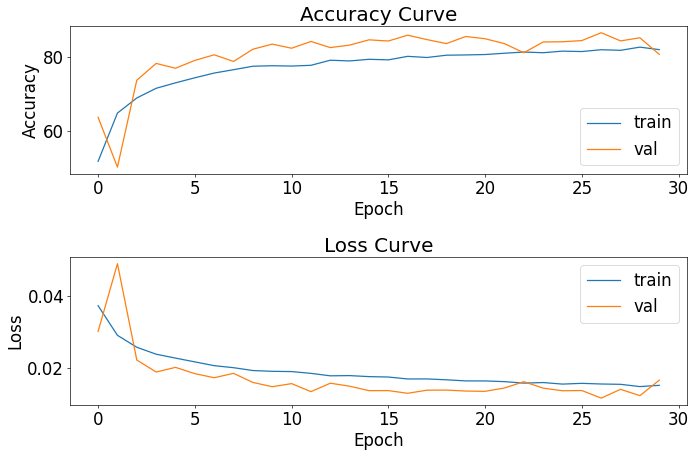

In [30]:
# 정확도(accuracy) 커브 시각화
plt.subplot(211)
plt.plot([i for i in range(epoch)], [i[0] for i in train_result])
plt.plot([i for i in range(epoch)], [i[0] for i in val_result])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])

# 손실(loss) 커브 시각화
plt.subplot(212)
plt.plot([i for i in range(epoch)], [i[1] for i in train_result])
plt.plot([i for i in range(epoch)], [i[1] for i in val_result])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])

plt.tight_layout()
plt.show()

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


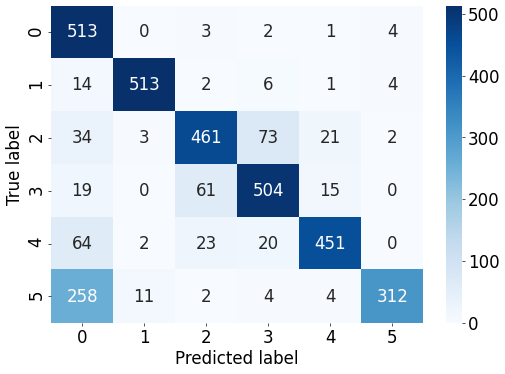

[ 각 클래스에 따른 정확도 ]
tensor([0.9809, 0.9500, 0.7761, 0.8414, 0.8054, 0.5279])
[ 전체 평균 정확도 ]
tensor(0.8083)


In [31]:
import pandas as pd
import seaborn as sns


net = LightResNet20()
net = net.to(device)

file_name = "./checkpoint/LightResNet20.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>Problem 5. 다양한 레이어 깊이에 따라 LightResNet 학습하기</b>

* Residual Block을 사용하는 경우 깊이가 깊어져도 좋은 성능을 내는 경향이 있습니다.
* 다음의 LightResNet 모델들에 대하여 각각 학습을 진행한 뒤에, 검증 정확도(validation accuracy)를 쓰세요.
    * LightResNet32: 0.8726
    * LightResNet56: 0.8709
    * LightResNet110: 0.8532
* 레이어가 깊어짐에 따라서 성능이 좋아지나요? 아니요
    * 그 이유는: 학습할 데이터가 Neural Net의 깊이보다 비교적 적을 경우 Overfitting이 일어나서 정확도가 감소할 수 있다.

#### <b>(알아보기) ResNet 아키텍처 살펴보기</b>

* [ResNet (2016 CVPR)](https://arxiv.org/abs/1512.03385) 논문에서 제안된 기본적인 ResNet의 핵심 아이디어를 PyTorch로 구현한 것은 다음과 같습니다.
    * LightResNet에 비하여 <b>커널의 개수(number of kernels)가 많은</b> 것을 확인할 수 있습니다.
    * 따라서 ImageNet과 같은 큰 규모의 데이터셋에 대해서 사용하기에 적합합니다.
* (참고) [PyTorch 공식 ResNet 소스 코드](https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py)

In [32]:
# ResNet 클래스 정의
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=6):
        super(ResNet, self).__init__()
        self.in_planes = 64

        # 64개의 3x3 필터(filter)를 사용
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        # 첫 레이어를 제외하고는 너비와 높이를 줄이기 위해 stride를 2로 설정
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1) # 첫째 블록만 너비와 높이 감소
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes # 다음 레이어를 위해 채널 수 변경
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, out.size()[3])
        out = out.view(out.size(0), -1) # 배치(batch)를 제외한 모든 차원 flatten하기
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])

#### <b>(알아보기) ResNet-18 학습하기</b>

* PyTorch로 구현된 ResNet-18 모델을 학습해 봅시다.

In [33]:
import time
import torch.optim as optim


net = ResNet18()
net = net.to(device)

epoch = 30
learning_rate = 0.002
file_name = "ResNet18.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
    train_acc, train_loss = train(net, i, optimizer, criterion, train_dataloader) # 학습(training)
    val_acc, val_loss = validate(net, i + 1, val_dataloader) # 검증(validation)

    # 학습된 모델 저장하기
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print(f'Model saved! (time elapsed: {time.time() - start_time})')

    # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
    train_result.append((train_acc, train_loss))
    val_result.append((val_acc, val_loss))

[ Train epoch: 0 ]
Train accuarcy: 55.896382182431935
Train average loss: 0.03548981565682757
[ Validation epoch: 1 ]
Accuarcy: 72.70325799823893
Average loss: 0.024244801570216617
Model saved! (time elapsed: 54.342772245407104)
[ Train epoch: 1 ]
Train accuarcy: 66.24348719454025
Train average loss: 0.0275316533911488
[ Validation epoch: 2 ]
Accuarcy: 74.64044614029939
Average loss: 0.02133628586922218
Model saved! (time elapsed: 108.34201240539551)
[ Train epoch: 2 ]
Train accuarcy: 71.07947457253981
Train average loss: 0.02420893739060102
[ Validation epoch: 3 ]
Accuarcy: 80.33460522453771
Average loss: 0.01754570516421713
Model saved! (time elapsed: 162.6357421875)
[ Train epoch: 3 ]
Train accuarcy: 73.22227929845161
Train average loss: 0.022317696487666523
[ Validation epoch: 4 ]
Accuarcy: 78.80833577927795
Average loss: 0.01740220247701987
Model saved! (time elapsed: 216.89209914207458)
[ Train epoch: 4 ]
Train accuarcy: 75.21831657738313
Train average loss: 0.020959121321708046


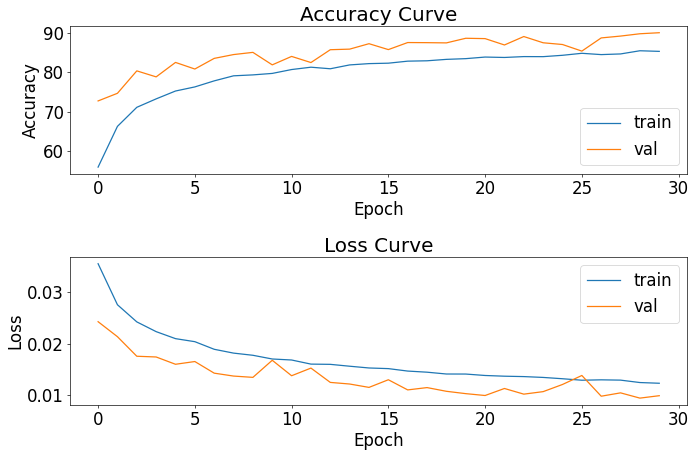

In [34]:
# 정확도(accuracy) 커브 시각화
plt.subplot(211)
plt.plot([i for i in range(epoch)], [i[0] for i in train_result])
plt.plot([i for i in range(epoch)], [i[0] for i in val_result])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])

# 손실(loss) 커브 시각화
plt.subplot(212)
plt.plot([i for i in range(epoch)], [i[1] for i in train_result])
plt.plot([i for i in range(epoch)], [i[1] for i in val_result])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])

plt.tight_layout()
plt.show()

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


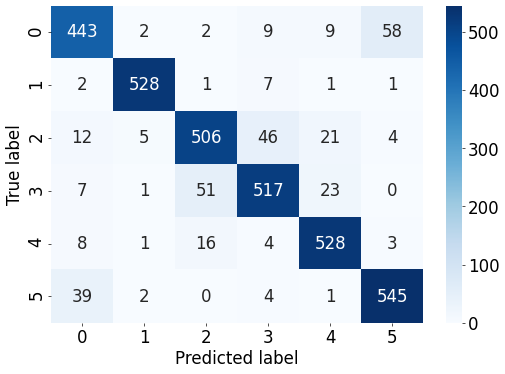

[ 각 클래스에 따른 정확도 ]
tensor([0.8470, 0.9778, 0.8519, 0.8631, 0.9429, 0.9222])
[ 전체 평균 정확도 ]
tensor(0.9002)


In [35]:
import pandas as pd
import seaborn as sns


net = ResNet18()
net = net.to(device)

file_name = "./checkpoint/ResNet18.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

#### <b>(알아보기) Input Mixup 살펴보기</b>

* Mixup은 대표적인 데이터 증진(data augmentation) 기법으로 정확도 향상에 도움이 됩니다.
    * 일반적으로 Mixup을 사용하는 경우 더 많은 횟수(1.5배가량)의 epoch이 요구됩니다.

In [41]:
mixup_alpha = 1.0


def mixup_data(x, y):
    lam = np.random.beta(mixup_alpha, mixup_alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).cuda()
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam


def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)


def train_with_mixup(net, epoch, optimizer, criterion, train_dataloader):
    print('[ Train epoch: %d ]' % epoch)
    net.train() # 모델을 학습 모드로 설정
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)
        inputs, targets_a, targets_b, lam = mixup_data(inputs, targets) # Mixup 진행
        optimizer.zero_grad() # 기울기(gradient) 초기화

        outputs = net(inputs) # 모델 입력하여 결과 계산
        loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam) # 손실(loss) 값 계산
        loss.backward() # 역전파를 통해 기울기(gradient) 계산

        optimizer.step() # 계산된 기울기를 이용해 모델 가중치 업데이트
        train_loss += loss.item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        correct += (lam * predicted.eq(targets_a).sum().item() + (1 - lam) * predicted.eq(targets_b).sum().item())

    print('Train accuarcy:', 100. * correct / total)
    print('Train average loss:', train_loss / total)
    return (100. * correct / total, train_loss / total)

#### <b>Problem 6. Mixup 결과 분석하기</b>

* Mixup을 사용하여 ResNet-18에 대하여 50번 epoch만큼 학습을 진행한 뒤에 성능이 얼마나 개선되었는지 쓰세요.
    * Mixup을 적용했을 때의 검증 정확도(validation accuracy): {답을 쓰세요.}

In [56]:
import time
import torch.optim as optim

net = ResNet18()
net = net.to(device)
epoch = 50
learning_rate = 0.002
file_name = "ResNet18.pt"

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

train_result = []
val_result = []

start_time = time.time()
for i in range(epoch):
  train_acc, train_loss = train_with_mixup(net, i, optimizer, criterion, train_dataloader)
  val_acc, val_loss = validate(net, i+1, val_dataloader)   
  state = {
    'net': net.state_dict()
 	}
  if not os.path.isdir('checkpoint'):
    os.mkdir('checkpoint')
  torch.save(state, './checkpoint/' + file_name)
  print(f'Model saved! (time elapsed: {time.time() - start_time})')
   
  # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
  train_result.append((train_acc, train_loss))
  val_result.append((val_acc, val_loss)) 

[ Train epoch: 0 ]
Train accuarcy: 43.700019815583715
Train average loss: 0.04521686023282595
[ Validation epoch: 1 ]
Accuarcy: 52.53889051951864
Average loss: 0.03757472118045145
Model saved! (time elapsed: 52.58813500404358)
[ Train epoch: 1 ]
Train accuarcy: 50.74514095031975
Train average loss: 0.04136685785932675
[ Validation epoch: 2 ]
Accuarcy: 76.69503962430291
Average loss: 0.022747568504041263
Model saved! (time elapsed: 106.92883634567261)
[ Train epoch: 2 ]
Train accuarcy: 53.62473722983596
Train average loss: 0.03957283344203714
[ Validation epoch: 3 ]
Accuarcy: 72.90871734663928
Average loss: 0.02367512454446334
Model saved! (time elapsed: 161.1764039993286)
[ Train epoch: 3 ]
Train accuarcy: 55.37414818379725
Train average loss: 0.03830420488025959
[ Validation epoch: 4 ]
Accuarcy: 76.40152626944526
Average loss: 0.022876966697644167
Model saved! (time elapsed: 215.74125266075134)
[ Train epoch: 4 ]
Train accuarcy: 56.40502699322913
Train average loss: 0.0377305567793812

#### <b>(알아보기) Transfer Learning 살펴보기</b>

* 전이 학습(Transfer Learning)은 <b>단기간에 우수한 정확도</b>를 얻기 위해 효과적으로 사용할 수 있는 기법입니다.
    * 본 실습에서는 미세 조정(fine-tuning) 기법을 사용합니다.
    * 적은 epoch만으로도 빠르게 수렴합니다.
* 전이 학습을 위해서는, 사전 학습된(pre-trained) 네트워크와 동일한 크기의 입력 차원을 갖도록 <b>데이터셋을 수정</b>해야 합니다.
    * ResNet 특성상 데이터셋 수정 없이도 동작할 수 있지만, 일반적으로 데이터셋을 수정합니다.
* (참고) [PyTorch 공식 Transfer Learning 튜토리얼](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)
* 기본적인 Transfer Learning을 이용해 91~93%의 정확도를 얻을 수 있습니다.

In [36]:
transforms_train_transferred = transforms.Compose([
    transforms.RandomResizedCrop((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_val_transferred = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset_transferred = datasets.ImageFolder(train_path, transforms_train_transferred)
val_dataset_transferred = datasets.ImageFolder(val_path, transforms_val_transferred)

train_dataloader_transferred = torch.utils.data.DataLoader(train_dataset_transferred, batch_size=16, shuffle=True, num_workers=2)
val_dataloader_transferred = torch.utils.data.DataLoader(val_dataset_transferred, batch_size=16, shuffle=True, num_workers=2)

print('Training dataset size:', len(train_dataset_transferred))
print('Validation dataset size:', len(val_dataset_transferred))

class_names = train_dataset_transferred.classes
print('Class names:', class_names)

Training dataset size: 13627
Validation dataset size: 3407
Class names: ['buildings', 'forests', 'glacier', 'mountains', 'sea', 'street']


In [37]:
#Resnet50 정확도 낮으면 ReLU 이용하기
class BottleNeck(nn.Module):
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()

        # in_planes = input_channel, planes = output_channel
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, stride=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes) # 배치 정규화(batch normalization)

        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes) # 배치 정규화(batch normalization)

        self.conv3 = nn.Conv2d(planes, planes * 4, kernel_size=1, stride=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes) # 배치 정규화(batch normalization)

        self.shortcut = nn.Sequential() # identity인 경우
        if stride != 1: # stride가 1이 아니라면, identity mapping이 아닌 경우
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes * 4, kernel_size=1, stride=stride, padding=0, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x) # (핵심) skip connection
        out = F.relu(out)
        return out

In [38]:
def ResNet50():
    return ResNet(BottleNeck, [3, 4, 6, 3])

In [39]:
def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate
    if epoch >= 20:
        lr /= 8
    if epoch >= 40:
        lr /= 8
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [ ]:
net = torchvision.models.resnet50(pretrained=True)

# 마지막 레이어의 차원을 6차원으로 조절
num_features = net.fc.in_features
net.fc = nn.Linear(num_features, 6)
net = net.to(device)

epoch = 50
# learning rate = 0.001로 변화 시키고 lr_scheduler 써보기
learning_rate = 0.002 # 일반적으로 fine-tuning을 진행할 때는 학습률(learning rate)을 낮게 설정
scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer,lr_lambda=lambda epoch: 0.95 ** epoch,last_epoch=-1,verbose=False)
file_name = "ResNet50Transferred.pt"

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)
optimizer = optim.Adam(net.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

train_result = []
val_result = []

start_time = time.time() # 시작 시간

for i in range(epoch):
  #adjust_learning_rate(optimizer, epoch)
  train_acc, train_loss = train_with_mixup(net, i, optimizer, criterion, train_dataloader_transferred) # 학습(training)
  val_acc, val_loss = validate(net, i + 1, val_dataloader_transferred) # 검증(validation)

  # 학습된 모델 저장하기
  state = {
      'net': net.state_dict()
  }
  if not os.path.isdir('checkpoint'):
      os.mkdir('checkpoint')
  torch.save(state, './checkpoint/' + file_name)
  print(f'Model saved! (time elapsed: {time.time() - start_time})')

  # 현재 epoch에서의 정확도(accuracy)와 손실(loss) 값 저장하기
  train_result.append((train_acc, train_loss))
  val_result.append((val_acc, val_loss))

[ Train epoch: 0 ]
Train accuarcy: 37.205088584155476
Train average loss: 0.09727401082370675
[ Validation epoch: 1 ]
Accuarcy: 54.29997064866451
Average loss: 0.08797597636706254
Model saved! (time elapsed: 162.0535717010498)
[ Train epoch: 1 ]
Train accuarcy: 45.627098628495666
Train average loss: 0.0872701075584967
[ Validation epoch: 2 ]
Accuarcy: 60.375697094217784
Average loss: 0.06492723014160864
Model saved! (time elapsed: 324.93621706962585)
[ Train epoch: 2 ]
Train accuarcy: 50.29540644609585
Train average loss: 0.08255058957832859
[ Validation epoch: 3 ]
Accuarcy: 70.70736718520693
Average loss: 0.05481000822381887
Model saved! (time elapsed: 488.08693528175354)
[ Train epoch: 3 ]
Train accuarcy: 51.19231740499458
Train average loss: 0.08163054792741219
[ Validation epoch: 4 ]
Accuarcy: 63.80980334605225
Average loss: 0.05915849028460819
Model saved! (time elapsed: 651.2185161113739)
[ Train epoch: 4 ]
Train accuarcy: 52.988881768778285
Train average loss: 0.0794151731367426

In [64]:
print(max(val_result)[0])

92.33930143821544


#### <b>Problem 7. State-of-the-Art 성능 만들기</b>

* SOTA 수준의 성능을 만들어 보세요.
* (참고) Transfer Learning과 Mixup을 함께 사용해 보세요.
    * 더 큰 규모의 사전 학습된 모델(ResNet-50 이상)을 이용해 보세요.
* (참고) learning rate scheduler를 사용해 보세요.

<pre>
def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate
    if epoch >= 20:
        lr /= 8
    if epoch >= 40:
        lr /= 8
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
</pre>

* 대회(competition)에 참여하고 있다고 생각하고, <b>94% 이상의 정확도</b>를 만들어 보세요.
    * 내 모델의 검증 정확도(validation accuracy): 92.5447607866158


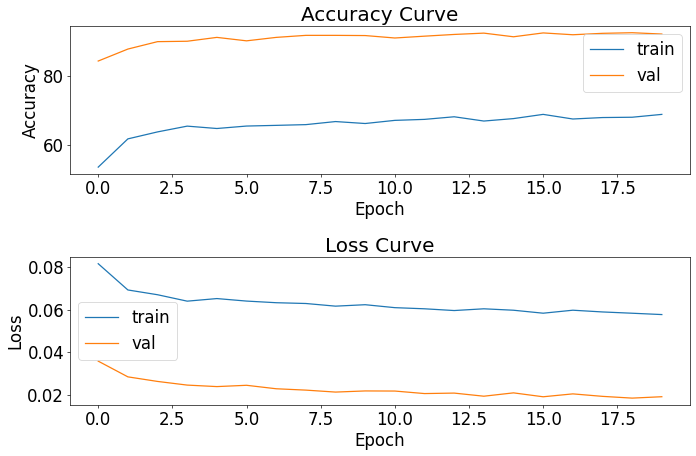

In [43]:
# 정확도(accuracy) 커브 시각화
plt.subplot(211)
plt.plot([i for i in range(epoch)], [i[0] for i in train_result])
plt.plot([i for i in range(epoch)], [i[0] for i in val_result])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])

# 손실(loss) 커브 시각화
plt.subplot(212)
plt.plot([i for i in range(epoch)], [i[1] for i in train_result])
plt.plot([i for i in range(epoch)], [i[1] for i in val_result])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])

plt.tight_layout()
plt.show()

[ 각 클래스당 데이터 개수 ]
tensor([523, 540, 594, 599, 560, 591])
[ 혼동 행렬(confusion matrix) 시각화 ]


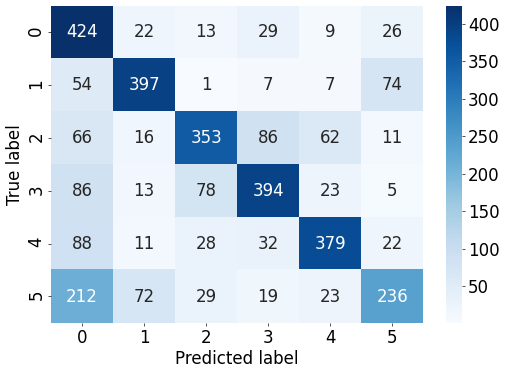

[ 각 클래스에 따른 정확도 ]
tensor([0.8107, 0.7352, 0.5943, 0.6578, 0.6768, 0.3993])
[ 전체 평균 정확도 ]
tensor(0.6407)


In [47]:
import pandas as pd
import seaborn as sns


net = torchvision.models.resnet50(pretrained=True)
num_features = net.fc.in_features
net.fc = nn.Linear(num_features, 6)
net = net.to(device)

file_name = "./checkpoint/ResNet50Transferred.pt"
checkpoint = torch.load(file_name)
net.load_state_dict(checkpoint['net'])

# 평가 데이터셋을 이용해 혼동 행렬(confusion matrix) 계산하기
confusion_matrix = get_confusion_matrix(net, 6, val_dataloader)
print("[ 각 클래스당 데이터 개수 ]")
print(confusion_matrix.sum(1))

print("[ 혼동 행렬(confusion matrix) 시각화 ]")
res = pd.DataFrame(confusion_matrix.numpy(), index = [i for i in range(6)], columns = [i for i in range(6)])
res.index.name = 'True label'
res.columns.name = 'Predicted label'
plt.figure(figsize = (10, 7))
sns.heatmap(res, annot=True, fmt="d", cmap='Blues')
plt.show()

print("[ 각 클래스에 따른 정확도 ]")
# (각 클래스마다 정답 개수 / 각 클래스마다 데이터의 개수)
print(confusion_matrix.diag() / confusion_matrix.sum(1))

print("[ 전체 평균 정확도 ]")
print(confusion_matrix.diag().sum() / confusion_matrix.sum())

# 정확도 올리는 방안
1. Adjust Learning Rate
2. Use Pretrained Resnet50 (BottleNeck)
3. Use Optimizer AdamW
4. Increase Epoch Number